In [1]:
import os
import sys

ROOT_PATH = os.path.abspath("../../")
sys.path.append(ROOT_PATH)

In [2]:
from common.aws.claude import BedrockClaude
from common.utils.images import encode_image_base64_from_file, display_image


claude = BedrockClaude(
    region="us-west-2",
    modelId="anthropic.claude-3-5-sonnet-20240620-v1:0"
)

## Invoke Multimodal LLM with Bedrock API


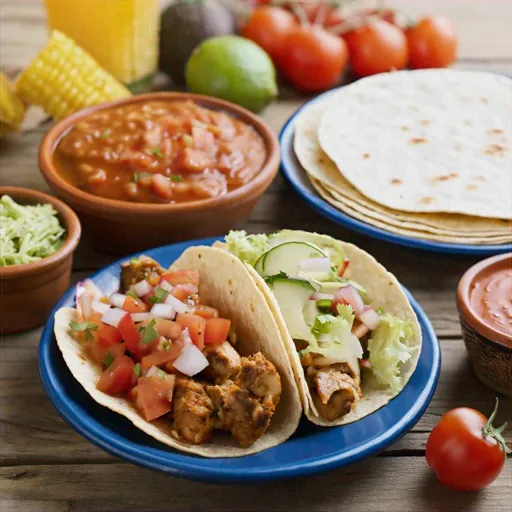

In the image, there are 2 tacos visible on the blue plate. These tacos appear to be filled with meat, vegetables, and other toppings. The image also shows various taco ingredients and accompaniments around the plate, including tortillas, salsa, lettuce, tomatoes, and corn.


In [5]:
encoded_base64 = encode_image_base64_from_file(file_path="./sample/food.png")
display_image(encoded_base64)

res = claude.invoke_llm_response(text="How many tacos are there?", image=encoded_base64)
print(res)

## Invoke Multimodal LLM with LangChain

In [7]:
from langchain.callbacks import StreamingStdOutCallbackHandler
from langchain.prompts import PromptTemplate
from langchain.schema import (
    HumanMessage,
    SystemMessage,
)

def get_prompt(text: str = 'Describe this image', image: str = None):
    content = []

    if image:
        content.append({
            "type": "image_url",
            "image_url": {
                "url": f"data:image/webp;base64,{image}",
            },
        })

    text = PromptTemplate(
            template="""Answer the user's questions, breaking them down into separate points.

            Here is a question from Human:
            <question>
            {question}
            </question>
            """,
            input_variables=["question"]
        ).format(question=text)

    content.append({
        "type": "text",
        "text": text
    })

    messages = [
        SystemMessage(content="You are a helpful assistant."),
        HumanMessage(
            content=content
        )
    ]

    return messages


In [8]:
# streaming response
callback = StreamingStdOutCallbackHandler()
chat = claude.get_chat_model(callback=callback)

prompt = get_prompt(text="How many tacos are there?", image=encoded_base64)
res = await chat.ainvoke(prompt)

Based on the image, I can see:

1. There are 2 tacos visible on the blue plate in the foreground of the image.

The tacos appear to be filled with meat, vegetables, and other typical taco toppings. They are served on soft tortillas and are accompanied by various side dishes and ingredients for Mexican cuisine.